# Setup Spark environment 

In [1]:
import time
import os

Start=time.time()
# Download and install tools 

# Install Java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# Download and Install Spark
!wget  -q http://apache.osuosl.org/spark/spark-2.4.7/spark-2.4.7-bin-hadoop2.7.tgz
!tar xf spark-2.4.7-bin-hadoop2.7.tgz

# Install findspark
!pip install -q findspark

# Set environment variables
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.7-bin-hadoop2.7"
import findspark
findspark.init()

print(f"\nIt took {(time.time()-Start)} seconds to install all dependencies for spark to run on Google Colab. \n")



It took 49.65678119659424 seconds to install all dependencies for spark to run on Google Colab. 



# Vectors and Matrices 

In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

API Guide: https://spark.apache.org/docs/2.4.7/api/python/pyspark.ml.html#module-pyspark.ml.linalg

MLlib utilities for linear algebra.  




## Vectors
For dense vectors, MLlib uses the __NumPy array__ type, so you can simply pass NumPy arrays around.  
For sparse vectors, you can construct a SparseVector object from MLlib or pass SciPy __scipy.sparse__ column vectors if __SciPy__ is available in the environment.

Docs (RDD-section): https://spark.apache.org/docs/latest/mllib-data-types.html#local-vector  


## Sparse Vector Example

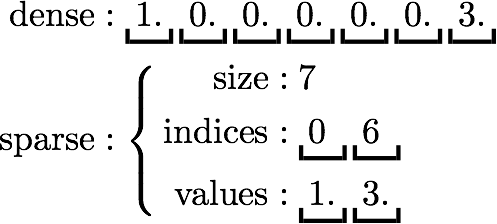

In [3]:
import numpy as np
from pyspark.ml.linalg import Vectors

# Create a SparseVector.
sv1 = Vectors.sparse(7, [0, 6], [1.0, 3.0])

print(sv1)

(7,[0,6],[1.0,3.0])


### Matrices

Docs (RDD-section): https://spark.apache.org/docs/latest/mllib-data-types.html#local-matrix

> The base class of local matrices is _Matrix_, and we provide two implementations: _DenseMatrix_, and _SparseMatrix_. We recommend using the factory methods implemented in _Matrices_ to create local matrices. Remember, local matrices in MLlib are stored in column-major order.


## Dense Matrix

In [4]:
from pyspark.ml.linalg import Matrices

# Create a dense matrix ((1.0, 2.0), (3.0, 4.0), (5.0, 6.0))
dm2 = Matrices.dense(3, 2, [1, 3, 5, 2, 4, 6])
print(dm2)

DenseMatrix([[1., 2.],
             [3., 4.],
             [5., 6.]])


## Sparse Matrix

In [5]:
# Create a sparse matrix ((9.0, 0.0), (0.0, 8.0), (0.0, 6.0))
sm = Matrices.sparse(3, 2, [0, 1, 3], [0, 2, 1], [9, 6, 8])
print(sm)

3 X 2 CSCMatrix
(0,0) 9.0
(2,1) 6.0
(1,1) 8.0


# Feature Engineering

In [6]:
from pyspark.ml.feature import MinMaxScaler
from pyspark.ml.linalg import Vectors

dataFrame = spark.createDataFrame([
    (0, Vectors.dense([1.0, 0.1, -1.0]),),
    (1, Vectors.dense([2.0, 1.1, 1.0]),),
    (2, Vectors.dense([3.0, 10.1, 3.0]),)
], ["id", "features"])

scaler = MinMaxScaler(inputCol="features", outputCol="scaledFeatures")

# Compute summary statistics and generate MinMaxScalerModel
scalerModel = scaler.fit(dataFrame)

# rescale each feature to range [min, max].
scaledData = scalerModel.transform(dataFrame)
print("Features scaled to range: [%f, %f]" % (scaler.getMin(), scaler.getMax()))
scaledData.select("features", "scaledFeatures").show()

Features scaled to range: [0.000000, 1.000000]
+--------------+--------------+
|      features|scaledFeatures|
+--------------+--------------+
|[1.0,0.1,-1.0]| [0.0,0.0,0.0]|
| [2.0,1.1,1.0]| [0.5,0.1,0.5]|
|[3.0,10.1,3.0]| [1.0,1.0,1.0]|
+--------------+--------------+



Features
---
MLlib Main Guide: https://spark.apache.org/docs/2.4.7/ml-features.html

This module contains algorithms for working with features, roughly divided into these groups:

- Extraction: Extracting features from “raw” data
- Transformation: Scaling, converting, or modifying features
- Selection: Selecting a subset from a larger set of features
- Locality Sensitive Hashing (LSH): This class of algorithms combines aspects of feature transformation with other algorithms.

## pyspark.ml.feature
Class structure: https://spark.apache.org/docs/2.4.7/api/python/pyspark.ml.html#module-pyspark.ml.feature  
GitHub: https://github.com/apache/spark/blob/v2.4.7/python/pyspark/ml/feature.py

### [Feature Extractors](https://spark.apache.org/docs/2.4.7/ml-features.html#feature-extractors)

- [HashingTF](https://spark.apache.org/docs/2.4.3/ml-features.html#tf-idf)
- [IDF & IDFModel](https://spark.apache.org/docs/2.4.3/ml-features.html#tf-idf)
- [Word2Vec & Word2VecModel](https://spark.apache.org/docs/2.4.3/ml-features.html#word2vec)
- [CountVectorizer & CountVectorizerModel](https://spark.apache.org/docs/2.4.3/ml-features.html#countvectorizer)
- [FeatureHasher](https://spark.apache.org/docs/2.4.3/ml-features.html#featurehasher)


### [Feature Transformers](https://spark.apache.org/docs/2.4.3/ml-features.html#feature-transformers)

- [Tokenizer](https://spark.apache.org/docs/2.4.3/ml-features.html#tokenizer)
- [RegexTokenizer](https://spark.apache.org/docs/2.4.3/ml-features.html#tokenizer)
- [StopWordsRemover](https://spark.apache.org/docs/2.4.3/ml-features.html#stopwordsremover)
- [NGram](https://spark.apache.org/docs/2.4.3/ml-features.html#n-gram)
- [Binarizer](https://spark.apache.org/docs/2.4.3/ml-features.html#binarizer)
- [PCA](https://spark.apache.org/docs/2.4.3/ml-features.html#pca)
- [PCAModel](https://spark.apache.org/docs/2.4.3/ml-features.html#pca)
- [PolynomialExpansion](https://spark.apache.org/docs/2.4.3/ml-features.html#polynomialexpansion)
- [DCT](https://spark.apache.org/docs/2.4.3/ml-features.html#discrete-cosine-transform-dct)
- [StringIndexer & StringIndexerModel](https://spark.apache.org/docs/2.4.3/ml-features.html#stringindexer)
- [IndexToString](https://spark.apache.org/docs/2.4.3/ml-features.html#indextostring)
- [OneHotEncoder & OneHotEncoderModel](https://spark.apache.org/docs/2.4.3/ml-features.html#onehotencoder-deprecated-since-230)
- [OneHotEncoderEstimator](https://spark.apache.org/docs/2.4.3/ml-features.html#onehotencoderestimator)
- [VectorIndexer](https://spark.apache.org/docs/2.4.3/ml-features.html#vectorindexer)
- [VectorIndexerModel](https://spark.apache.org/docs/2.4.3/ml-features.html#vectorindexer)
- [Normalizer](https://spark.apache.org/docs/2.4.3/ml-features.html#normalizer)
- [StandardScaler & StandardScalerModel](https://spark.apache.org/docs/2.4.3/ml-features.html#standardscaler)
- [MinMaxScaler & MinMaxScalerModel](https://spark.apache.org/docs/2.4.3/ml-features.html#minmaxscaler)
- [MaxAbsScaler & MaxAbsScalerModel](https://spark.apache.org/docs/2.4.3/ml-features.html#maxabsscaler)
- [Bucketizer](https://spark.apache.org/docs/2.4.3/ml-features.html#bucketizer)
- [ElementwiseProduct](https://spark.apache.org/docs/2.4.3/ml-features.html#elementwiseproduct)
- [SQLTransformer](https://spark.apache.org/docs/2.4.3/ml-features.html#sqltransformer)
- [VectorAssembler](https://spark.apache.org/docs/2.4.3/ml-features.html#vectorassembler)
- [VectorSizeHint](https://spark.apache.org/docs/2.4.3/ml-features.html#vectorsizehint)
- [QuantileDiscretizer](https://spark.apache.org/docs/2.4.3/ml-features.html#quantilediscretizer)
- [Imputer & ImputerModel](https://spark.apache.org/docs/2.4.3/ml-features.html#imputer)

Not available in Python:
- [Interaction](https://spark.apache.org/docs/2.4.3/ml-features.html#interaction)

## [Feature Selectors](https://spark.apache.org/docs/2.4.3/ml-features.html#feature-selectors)

- [VectorSlicer](https://spark.apache.org/docs/2.4.3/ml-features.html#vectorslicer)
- [RFormula & RFormulaModel](https://spark.apache.org/docs/2.4.3/ml-features.html#rformula)
- [ChiSqSelector & ChiSqSelectorModel](https://spark.apache.org/docs/2.4.3/ml-features.html#chisqselector)


## [Locality Sensitive Hashing (LSH)](https://spark.apache.org/docs/2.4.3/ml-features.html#locality-sensitive-hashing)

- [BucketedRandomProjectionLSH & BucketedRandomProjectionLSHModel](https://spark.apache.org/docs/2.4.3/ml-features.html#bucketed-random-projection-for-euclidean-distance)
- [MinHashLSH & MinHashLSHModel](https://spark.apache.org/docs/2.4.3/ml-features.html#minhash-for-jaccard-distance)

--------------------

## QuantileDiscretizer

- [Link](https://spark.apache.org/docs/2.4.3/ml-features.html#quantilediscretizer)

QuantileDiscretizer takes a column with continuous features and outputs a column with binned categorical features. The number of bins is set by the numBuckets parameter. It is possible that the number of buckets used will be smaller than this value, for example, if there are too few distinct values of the input to create enough distinct quantiles.

In [7]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

In [8]:
from pyspark.ml.feature import QuantileDiscretizer

data = [(0, 18.0), (1, 19.0), (2, 8.0), (3, 5.0), (4, 2.2),(5,10.0)]
df = spark.createDataFrame(data, ["id", "hour"])

discretizer = QuantileDiscretizer(numBuckets=3, inputCol="hour", outputCol="result")

result = discretizer.fit(df).transform(df)
result.show()

+---+----+------+
| id|hour|result|
+---+----+------+
|  0|18.0|   2.0|
|  1|19.0|   2.0|
|  2| 8.0|   1.0|
|  3| 5.0|   1.0|
|  4| 2.2|   0.0|
|  5|10.0|   2.0|
+---+----+------+



## Word2Vec

Word2Vec is an Estimator which takes sequences of words representing documents and trains a Word2VecModel. The model maps each word to a unique fixed-size vector. The Word2VecModel transforms each document into a vector using the average of all words in the document; this vector can then be used as features for prediction, document similarity calculations, etc. 

[Link](https://spark.apache.org/docs/2.4.3/ml-features.html#word2vec)

In [9]:
from pyspark.ml.feature import Word2Vec

# Input data: Each row is a bag of words from a sentence or document.
documentDF = spark.createDataFrame(
    [
        ("Hi I heard about Spark".split(" "),),
        ("I wish Java could use case classes".split(" "),),
        ("Logistic regression models are neat".split(" "),),
    ],
    ["text"],
)

# Learn a mapping from words to Vectors.
word2Vec = Word2Vec(vectorSize=3, minCount=0, inputCol="text", outputCol="result")
model = word2Vec.fit(documentDF)

result = model.transform(documentDF)
for row in result.collect():
    text, vector = row
    print(f"Text: {text} => \nVector: {vector}\n")

Text: ['Hi', 'I', 'heard', 'about', 'Spark'] => 
Vector: [0.035423544165678326,0.0079280111938715,-0.021331259980797768]

Text: ['I', 'wish', 'Java', 'could', 'use', 'case', 'classes'] => 
Vector: [-0.02603385703904288,-0.0041177283440317425,-0.01595430581697396]

Text: ['Logistic', 'regression', 'models', 'are', 'neat'] => 
Vector: [-0.08101594150066377,0.05188082894310356,0.03756050691008568]



## StringIndexer

StringIndexer encodes a string column of labels to a column of label indices.  

[Link](https://spark.apache.org/docs/2.4.3/ml-features.html#StringIndexer)

In [10]:
from pyspark.ml.feature import StringIndexer

df = spark.createDataFrame(
    [
        (0, "a"),
        (1, "b"),
        (2, "c"),
        (3, "a"),
        (4, "a"),
        (5, "c"),
        (6, "d"),
        (7, "a"),
        (8, "d"),
    ],
    ["id", "category"],
)

indexer = StringIndexer(inputCol="category", outputCol="categoryIndex")
indexed = indexer.fit(df).transform(df)
indexed.show()

+---+--------+-------------+
| id|category|categoryIndex|
+---+--------+-------------+
|  0|       a|          0.0|
|  1|       b|          3.0|
|  2|       c|          2.0|
|  3|       a|          0.0|
|  4|       a|          0.0|
|  5|       c|          2.0|
|  6|       d|          1.0|
|  7|       a|          0.0|
|  8|       d|          1.0|
+---+--------+-------------+



## FeatureHasher

Feature hashing projects a set of categorical or numerical features into a feature vector of specified dimension (typically substantially smaller than that of the original feature space). This is done using the hashing trick to map features to indices in the feature vector. 

[Link](https://spark.apache.org/docs/2.4.3/ml-features.html#featurehasher)

In [11]:
from pyspark.ml.feature import FeatureHasher

dataset = spark.createDataFrame(
    [
        (2.2, True, "1", "foo"),
        (3.3, False, "2", "bar"),
        (4.4, False, "3", "baz"),
        (5.5, False, "4", "foo"),
    ],
    ["real", "bool", "stringNum", "string"],
)

hasher = FeatureHasher(
    inputCols=["real", "bool", "stringNum", "string"], outputCol="features"
)

featurized = hasher.transform(dataset)
featurized.show(truncate=False)

+----+-----+---------+------+--------------------------------------------------------+
|real|bool |stringNum|string|features                                                |
+----+-----+---------+------+--------------------------------------------------------+
|2.2 |true |1        |foo   |(262144,[174475,247670,257907,262126],[2.2,1.0,1.0,1.0])|
|3.3 |false|2        |bar   |(262144,[70644,89673,173866,174475],[1.0,1.0,1.0,3.3])  |
|4.4 |false|3        |baz   |(262144,[22406,70644,174475,187923],[1.0,1.0,4.4,1.0])  |
|5.5 |false|4        |foo   |(262144,[70644,101499,174475,257907],[1.0,1.0,5.5,1.0]) |
+----+-----+---------+------+--------------------------------------------------------+



## VectorIndexer

VectorIndexer helps index categorical features in datasets of Vectors. It can both automatically decide which features are categorical and convert original values to category indices. 

[Link](https://spark.apache.org/docs/2.4.7/ml-features.html#vectorindexer)

In [12]:

from pyspark.ml.feature import VectorIndexer

data = spark.read.format("libsvm").load(
    "/content/spark-2.4.7-bin-hadoop2.7/data/mllib/sample_libsvm_data.txt"
)

indexer = VectorIndexer(inputCol="features", outputCol="indexed", maxCategories=10)
indexerModel = indexer.fit(data)

categoricalFeatures = indexerModel.categoryMaps
print(
    f"Chose {len(categoricalFeatures)} categorical "
    f"features: {[str(k) for k in categoricalFeatures.keys()]}"
)

# Create new column "indexed" with categorical values transformed to indices
indexedData = indexerModel.transform(data)
indexedData.show(truncate=True)

Chose 351 categorical features: ['645', '69', '365', '138', '101', '479', '333', '249', '0', '555', '666', '88', '170', '115', '276', '308', '5', '449', '120', '247', '614', '677', '202', '10', '56', '533', '142', '500', '340', '670', '174', '42', '417', '24', '37', '25', '257', '389', '52', '14', '504', '110', '587', '619', '196', '559', '638', '20', '421', '46', '93', '284', '228', '448', '57', '78', '29', '475', '164', '591', '646', '253', '106', '121', '84', '480', '147', '280', '61', '221', '396', '89', '133', '116', '1', '507', '312', '74', '307', '452', '6', '248', '60', '117', '678', '529', '85', '201', '220', '366', '534', '102', '334', '28', '38', '561', '392', '70', '424', '192', '21', '137', '165', '33', '92', '229', '252', '197', '361', '65', '97', '665', '583', '285', '224', '650', '615', '9', '53', '169', '593', '141', '610', '420', '109', '256', '225', '339', '77', '193', '669', '476', '642', '637', '590', '679', '96', '393', '647', '173', '13', '41', '503', '134', '73'

## Bucketizer

Bucketizer transforms a column of continuous features to a column of feature buckets, where the buckets are specified by users

[link](https://spark.apache.org/docs/2.4.7/ml-features.html#bucketizer)

In [13]:
from pyspark.ml.feature import Bucketizer

splits = [-float("inf"), -0.5, 0.0, 0.5, float("inf")]

data = [
    (-999.9,),
    (-0.5,),
    (-0.3,),
    (-0.4,),
    (-0.2,),
    (0.0,),
    (0.1,),
    (0.2,),
    (0.3,),
    (999.9,),
]
dataFrame = spark.createDataFrame(data, ["features"])

bucketizer = Bucketizer(
    splits=splits, inputCol="features", outputCol="bucketedFeatures"
)

# Transform original data into its bucket index.
bucketedData = bucketizer.transform(dataFrame)

print(f"Bucketizer output with {len(bucketizer.getSplits())-1} buckets")
bucketedData.show()

Bucketizer output with 4 buckets
+--------+----------------+
|features|bucketedFeatures|
+--------+----------------+
|  -999.9|             0.0|
|    -0.5|             1.0|
|    -0.3|             1.0|
|    -0.4|             1.0|
|    -0.2|             1.0|
|     0.0|             2.0|
|     0.1|             2.0|
|     0.2|             2.0|
|     0.3|             2.0|
|   999.9|             3.0|
+--------+----------------+



## Prepare your Data for your ML algorithms  

- label 
- Features 

In [14]:
from pyspark.sql import SparkSession
from pyspark.ml.linalg import Vectors

spark = SparkSession.builder.getOrCreate()

# Prepare training data from a list of (label, features) tuples.
training = spark.createDataFrame(
    [
        (1.0, Vectors.dense([0.0, 1.1, 0.1])),
        (0.0, Vectors.dense([2.0, 1.0, -1.0])),
        (0.0, Vectors.dense([2.0, 1.3, 1.0])),
        (1.0, Vectors.dense([0.0, 1.2, -0.5])),
    ],
    ["label", "features"],
)

# Prepare data
data = spark.createDataFrame(
    [
        (1.0, Vectors.dense([-1.0, 1.5, 1.3])),
        (0.0, Vectors.dense([3.0, 2.0, -0.1])),
        (1.0, Vectors.dense([0.0, 2.2, -0.0])),
        (1.0, Vectors.dense([-1.5, 1.5, 1.9])),
        (0.0, Vectors.dense([0.0, 0.0, -0.1])),
        (1.0, Vectors.dense([0.0, 2.2, -1.5])),
    ],
    ["label", "features"],
)

data.show(10)

+-----+--------------+
|label|      features|
+-----+--------------+
|  1.0|[-1.0,1.5,1.3]|
|  0.0|[3.0,2.0,-0.1]|
|  1.0|[0.0,2.2,-0.0]|
|  1.0|[-1.5,1.5,1.9]|
|  0.0|[0.0,0.0,-0.1]|
|  1.0|[0.0,2.2,-1.5]|
+-----+--------------+



## Correlation


In [15]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.stat import Correlation

data = [
    (Vectors.sparse(4, [(0, 100.0), (3, -2.0)]),),
    (Vectors.dense([4.0, 5.0, 0.0, 3.0]),),
    (Vectors.dense([6.0, 7.0, 0.0, 8.0]),),
    (Vectors.sparse(4, [(0, 9.0), (3, 1.0)]),),
]
df = spark.createDataFrame(data, ["features"])

# Pearson
print("Pearson correlation matrix:")
r1 = Correlation.corr(df, "features")
#r1.show()
print(f"{r1.first()[0]}\n")

# Spearman
df = df.cache()
print("Spearman correlation matrix:")
r2 = Correlation.corr(df, "features", "spearman")
#r2.show()
print(f"{r2.first()[0]}\n")


Pearson correlation matrix:
DenseMatrix([[ 1.        , -0.58938206,         nan, -0.72490248],
             [-0.58938206,  1.        ,         nan,  0.91359586],
             [        nan,         nan,  1.        ,         nan],
             [-0.72490248,  0.91359586,         nan,  1.        ]])

Spearman correlation matrix:
DenseMatrix([[ 1.        , -0.73786479,         nan, -0.8       ],
             [-0.73786479,  1.        ,         nan,  0.9486833 ],
             [        nan,         nan,  1.        ,         nan],
             [-0.8       ,  0.9486833 ,         nan,  1.        ]])



## Summarizer

Spark provides vector column summary statistics for Dataframes through Summarizer. Available metrics are the column-wise max, min, mean, variance, and number of nonzeros, as well as the total count. 

This feature was newly added in Spark 2.4.0 


### `ml.stat.Summarizer`
API guide: https://spark.apache.org/docs/2.4.7/api/python/pyspark.ml.html#pyspark.ml.stat.Summarizer  
Tools for vectorized statistics on MLlib Vectors. The methods in this package provide various statistics for `Vectors` contained inside `DataFrame`s. This class lets users pick the statistics they would like to extract for a given column.

There are two ways to use this class, singular or multiple. Instructions below.

#### 1. Computing singular metrics:
- `mean(col, weightCol=None)`  
coefficient-wise mean.
- `variance(col, weightCol=None)`  
coefficient-wise variance.
- `count(col, weightCol=None)`  
count of all vectors seen
- `numNonZeros(col, weightCol=None)`  
number of non-zeros for each coefficient
- `max(col, weightCol=None)`  
maximum for each coefficient
- `min(col, weightCol=None)`  
minimum for each coefficient
- `normL1(col, weightCol=None)`  
L1 norm of each coefficient (sum of the absolute values)
- `normL2(col, weightCol=None)`  
Euclidean norm for each coefficient
    
#### 2. Multiple metrics  
To compute multiple metrics, first run `Summarizer.metrics` with the specific metrics that you want to compute.

- `Summarizer.metrics(*metrics)`
Given a list of metrics, provides a builder that computes metrics from a column.  
Available metrics (same as singular metrics above): `mean`, `variance`, `count`, `numNonZeros`, `max`, `min`, `normL1`, `normL2`

This returns an instance of the `SummaryBuilder` class. On this return instance of `SummaryBuilder` use the `.summary()` method.  
```python
SummaryBuilder.summary("featuresCol", weightCol=None)
```

### Examples

In [16]:
from pyspark.ml.stat import Summarizer
from pyspark.ml.linalg import Vectors

data = [
    (1.0, Vectors.dense(1.0, 1.0, 1.0)),
    (0.0, Vectors.dense(1.0, 2.0, 3.0)),
]

df = spark.createDataFrame(data, ["weight", "features"])

# compute statistics for single metric "mean" with weight
df.select(Summarizer.mean(df.features, df.weight)).show(truncate=False)

# compute statistics for single metric "mean" without weight
df.select(Summarizer.mean(df.features)).show(truncate=False)

# create summarizer for multiple metrics "mean", "count", "numNonZeros"
summarizer = Summarizer.metrics("mean", "count", "numNonZeros")

# compute statistics for multiple metrics with weight
df.select(summarizer.summary(df.features, df.weight)).show(truncate=False)

# compute statistics for multiple metrics without weight
df.select(summarizer.summary(df.features)).show(truncate=False)

+--------------+
|mean(features)|
+--------------+
|[1.0,1.0,1.0] |
+--------------+

+--------------+
|mean(features)|
+--------------+
|[1.0,1.5,2.0] |
+--------------+

+-----------------------------------+
|aggregate_metrics(features, weight)|
+-----------------------------------+
|[[1.0,1.0,1.0], 1, [1.0,1.0,1.0]]  |
+-----------------------------------+

+---------------------------------+
|aggregate_metrics(features, 1.0) |
+---------------------------------+
|[[1.0,1.5,2.0], 2, [2.0,2.0,2.0]]|
+---------------------------------+

